## Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

## Load the datasets

In [2]:
movies_data = pd.read_csv('IMDbRatings_IndianMovies.csv')
prices_data = pd.read_csv('tortilla_prices.csv')
diabetes_data = pd.read_csv('diabetes_prediction_dataset.csv')

## Data Preprocessing

In [3]:
movies_data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
1,#Homecoming,-2021.0,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
2,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
3,...And Once Again,-2010.0,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
4,...Aur Pyaar Ho Gaya,-1997.0,147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor


In [4]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

movies_data['Name'] = label_encoder.fit_transform(movies_data['Name'])
movies_data['Genre'] = label_encoder.fit_transform(movies_data['Genre'])
movies_data['Duration'] = label_encoder.fit_transform(movies_data['Duration'])
movies_data['Rating'] = label_encoder.fit_transform(movies_data['Rating'])
movies_data['Director'] = label_encoder.fit_transform(movies_data['Director'])
movies_data['Actor 1'] = label_encoder.fit_transform(movies_data['Actor 1'])
movies_data['Actor 2'] = label_encoder.fit_transform(movies_data['Actor 2'])
movies_data['Actor 3'] = label_encoder.fit_transform(movies_data['Actor 3'])

movies_data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,0,-2019.0,9,299,56,8,1548,3280,4790,527
1,1,-2021.0,172,351,84,NaN,5123,3713,2866,3450
2,2,-2019.0,10,228,30,35,3319,2917,1504,4020
3,3,-2010.0,5,299,84,NaN,385,3112,3462,405
4,4,-1997.0,47,197,33,827,3800,895,123,3829


In [5]:
prices_data.head()

,State,City,Year,Month,Day,Store type,Price per kilogram
0,Aguascalientes,Aguascalientes,2007,1,10,Mom and Pop Store,9.9
1,Baja California,Mexicali,2007,1,10,Mom and Pop Store,NaN
2,Baja California,Tijuana,2007,1,10,Mom and Pop Store,10.0
3,Baja California Sur,La Paz,2007,1,10,Mom and Pop Store,10.0
4,Campeche,Campeche,2007,1,10,Mom and Pop Store,10.0


In [6]:
prices_data['State'] = label_encoder.fit_transform(prices_data['State'])
prices_data['City'] = label_encoder.fit_transform(prices_data['City'])
prices_data['Store type'] = label_encoder.fit_transform(prices_data['Store type'])

prices_data.head()

,State,City,Year,Month,Day,Store type,Price per kilogram
0,0,1,2007,1,10,1,9.9
1,1,24,2007,1,10,1,NaN
2,1,43,2007,1,10,1,10.0
3,2,21,2007,1,10,1,10.0
4,3,2,2007,1,10,1,10.0


In [7]:
diabetes_data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [8]:
diabetes_data['gender'] = label_encoder.fit_transform(diabetes_data['gender'])
diabetes_data['smoking_history'] = label_encoder.fit_transform(diabetes_data['smoking_history'])

diabetes_data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


### Number of records

In [9]:
movies_data.shape

(15508, 10)

In [10]:
prices_data.shape

(278886, 7)

In [11]:
diabetes_data.shape

(100000, 9)

### Check for missing values

In [12]:
total_missing_values = movies_data.isnull().sum().sum()

total_records = movies_data.shape[0]
proportion_missing_values = total_missing_values / (total_records * movies_data.shape[1])

print("Number of missing values in total:", total_missing_values)
print("Proportion of missing values in total:", proportion_missing_values)

Number of missing values in total: 8115
Proportion of missing values in total: 0.05232783079700799


In [13]:
total_missing_values = prices_data.isnull().sum().sum()

total_records = prices_data.shape[0]
proportion_missing_values = total_missing_values / (total_records * prices_data.shape[1])

print("Number of missing values in total:", total_missing_values)
print("Proportion of missing values in total:", proportion_missing_values)

imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(prices_data), columns=prices_data.columns)

total_missing_values_after_imputation = data_imputed.isnull().sum().sum()

print("Number of missing values after imputation:", total_missing_values_after_imputation)

Number of missing values in total: 6390
Proportion of missing values in total: 0.0032732268484511337
Number of missing values after imputation: 0


In [14]:
total_missing_values = diabetes_data.isnull().sum().sum()

total_records = diabetes_data.shape[0]
proportion_missing_values = total_missing_values / (total_records * diabetes_data.shape[1])

print("Number of missing values in total:", total_missing_values)
print("Proportion of missing values in total:", proportion_missing_values)

imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(diabetes_data), columns=diabetes_data.columns)

total_missing_values_after_imputation = data_imputed.isnull().sum().sum()

print("Number of missing values after imputation:", total_missing_values_after_imputation)

Number of missing values in total: 0
Proportion of missing values in total: 0.0
Number of missing values after imputation: 0


### Check the data info

In [15]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15508 entries, 0 to 15507
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15508 non-null  int32  
 1   Year      14981 non-null  float64
 2   Duration  15508 non-null  int32  
 3   Genre     15508 non-null  int32  
 4   Rating    15508 non-null  int64  
 5   Votes     7920 non-null   object 
 6   Director  15508 non-null  int32  
 7   Actor 1   15508 non-null  int32  
 8   Actor 2   15508 non-null  int32  
 9   Actor 3   15508 non-null  int32  
dtypes: float64(1), int32(7), int64(1), object(1)
memory usage: 787.6+ KB


In [16]:
prices_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278886 entries, 0 to 278885
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   State               278886 non-null  int32  
 1   City                278886 non-null  int32  
 2   Year                278886 non-null  int64  
 3   Month               278886 non-null  int64  
 4   Day                 278886 non-null  int64  
 5   Store type          278886 non-null  int32  
 6   Price per kilogram  272496 non-null  float64
dtypes: float64(1), int32(3), int64(3)
memory usage: 11.7 MB


In [17]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  int32  
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  int32  
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int32(2), int64(4)
memory usage: 6.1 MB


### Statistical Analysis - Summary of each variable: min, max, mean, median, and quartiles

In [18]:
movies_data.describe()

,Name,Year,Duration,Genre,Rating,Director,Actor 1,Actor 2,Actor 3
count,15508.000000,14981.000000,15508.000000,15508.000000,15508.000000,15508.000000,15508.000000,15508.000000,15508.000000
mean,6900.924942,-1987.012215,123.456539,271.534434,63.786884,2987.883544,2574.363748,2832.252708,2869.020506
std,3994.871710,25.416689,71.263112,164.415251,22.113606,1717.643842,1456.559240,1542.459323,1555.200911
min,0.000000,-2022.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3442.750000,-2009.000000,43.000000,163.000000,46.000000,1531.000000,1302.000000,1518.000000,1541.750000
50%,6901.000000,-1991.000000,182.000000,299.000000,69.000000,2922.500000,2581.500000,2876.000000,2905.000000
75%,10368.250000,-1968.000000,182.000000,409.000000,84.000000,4416.000000,3821.000000,4286.000000,4489.000000
max,13836.000000,-1913.000000,182.000000,485.000000,84.000000,5938.000000,4718.000000,4891.000000,4820.000000


In [19]:
prices_data.describe()

,State,City,Year,Month,Day,Store type,Price per kilogram
count,278886.000000,278886.000000,278886.000000,278886.000000,278886.000000,278886.000000,272496.000000
mean,16.228118,27.352402,2015.080015,6.384781,15.951955,0.502460,12.054586
std,9.364183,16.248063,4.912392,3.440216,8.755248,0.499995,4.336487
min,0.000000,0.000000,2007.000000,1.000000,1.000000,0.000000,0.000000
25%,8.000000,13.000000,2011.000000,3.000000,8.000000,0.000000,9.570000
50%,16.000000,27.000000,2015.000000,6.000000,16.000000,1.000000,11.170000
75%,25.000000,42.000000,2019.000000,9.000000,24.000000,1.000000,14.000000
max,31.000000,55.000000,2024.000000,12.000000,31.000000,1.000000,31.000000


In [20]:
diabetes_data.describe()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.414660,41.885856,0.07485,0.039420,2.179650,27.320767,5.527507,138.058060,0.085000
std,0.493031,22.516840,0.26315,0.194593,1.889659,6.636783,1.070672,40.708136,0.278883
min,0.000000,0.080000,0.00000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,0.000000,24.000000,0.00000,0.000000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,0.000000,43.000000,0.00000,0.000000,3.000000,27.320000,5.800000,140.000000,0.000000
75%,1.000000,60.000000,0.00000,0.000000,4.000000,29.580000,6.200000,159.000000,0.000000
max,2.000000,80.000000,1.00000,1.000000,5.000000,95.690000,9.000000,300.000000,1.000000


### Check the outliers

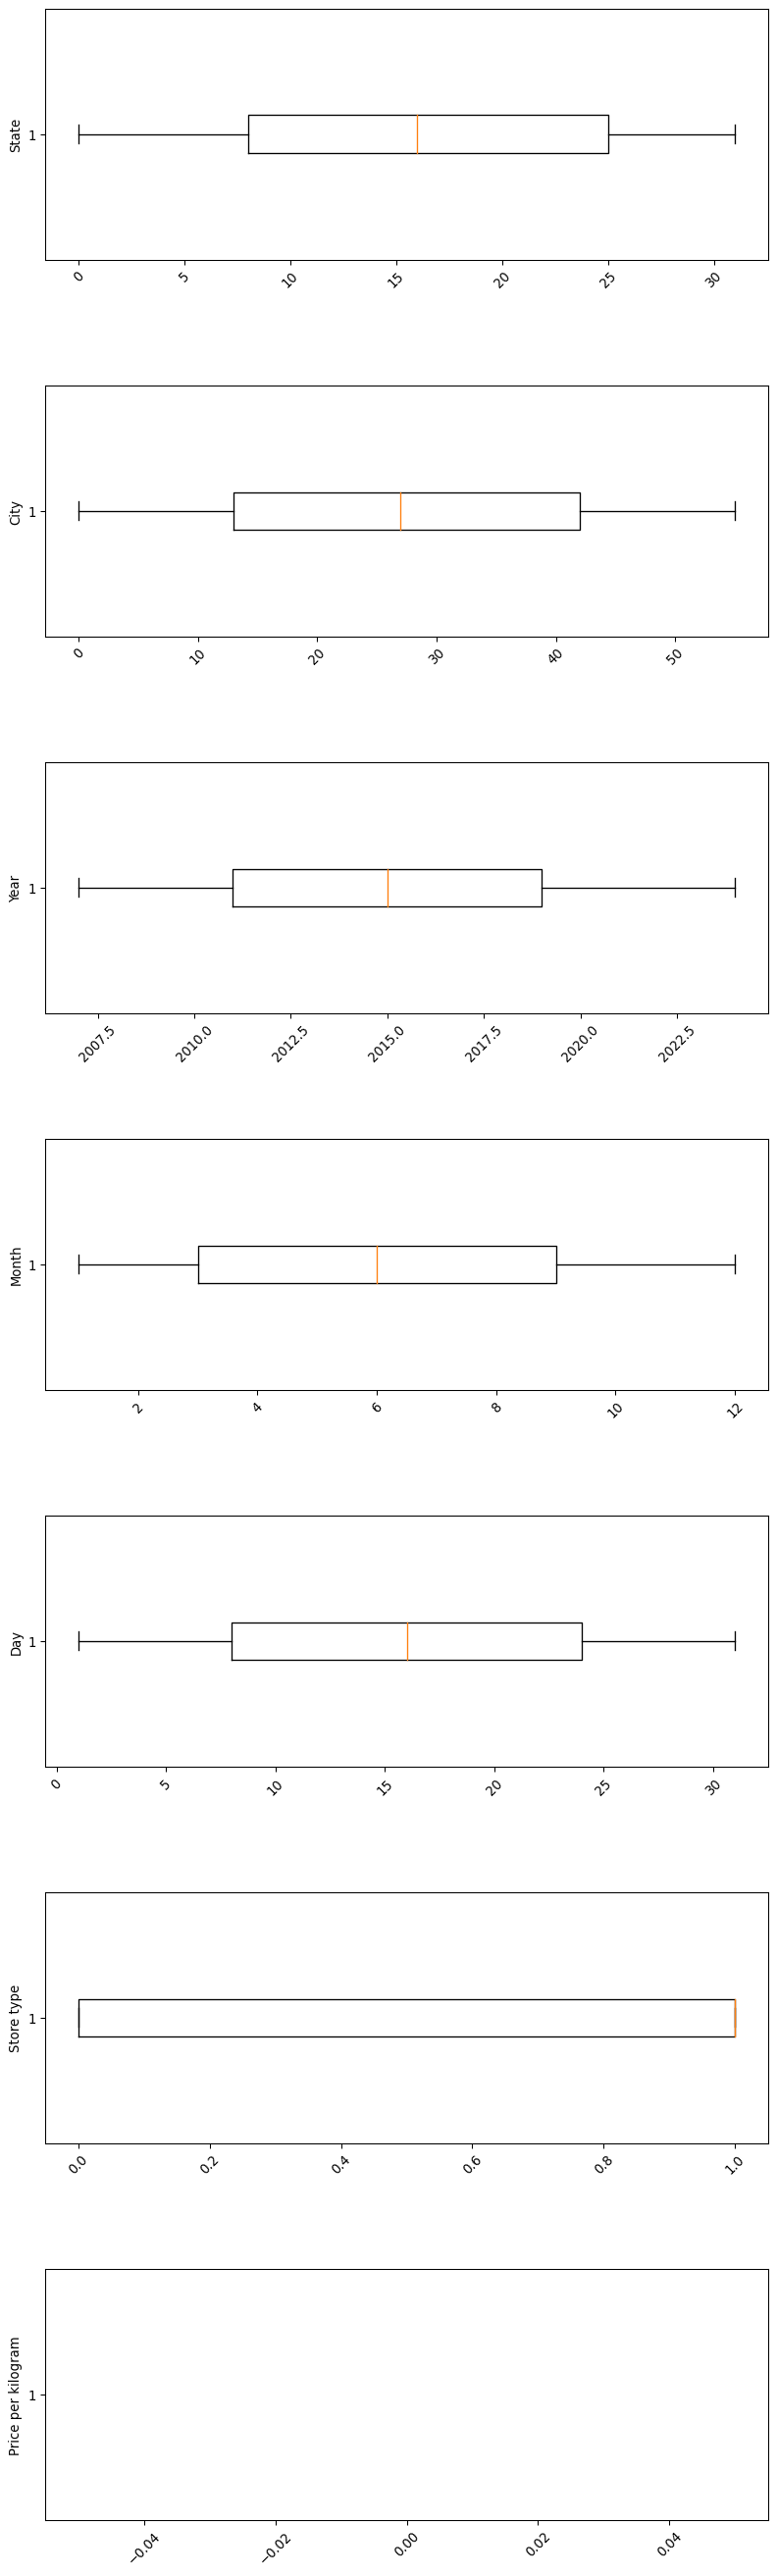

In [21]:
fig, axs = plt.subplots(len(prices_data.columns), 1, dpi=95, figsize=(10, 5*len(prices_data.columns)), 
                        gridspec_kw={'hspace': 0.5})

for i, col in enumerate(prices_data.columns):
    axs[i].boxplot(prices_data[col], vert=False)
    axs[i].set_ylabel(col)
    axs[i].tick_params(axis='x', rotation=45)  

plt.show()

In [22]:
z_scores = stats.zscore(prices_data)

threshold = 3

outliers = (z_scores > threshold) | (z_scores < -threshold)

num_outliers = outliers.sum()

total_records = prices_data.shape[0]
proportion_outliers = num_outliers / total_records

prices_cleaned_data = prices_data[~outliers.any(axis=1)]

prices_cleaned_data.to_csv('prices_cleaned_data.csv', index=False)

print("Number of outliers filtered:", num_outliers)
print("Proportion of outliers filtered:", proportion_outliers)

Number of outliers filtered: State                 0
City                  0
Year                  0
Month                 0
Day                   0
Store type            0
Price per kilogram    0
dtype: int64
Proportion of outliers filtered: State                 0.0
City                  0.0
Year                  0.0
Month                 0.0
Day                   0.0
Store type            0.0
Price per kilogram    0.0
dtype: float64


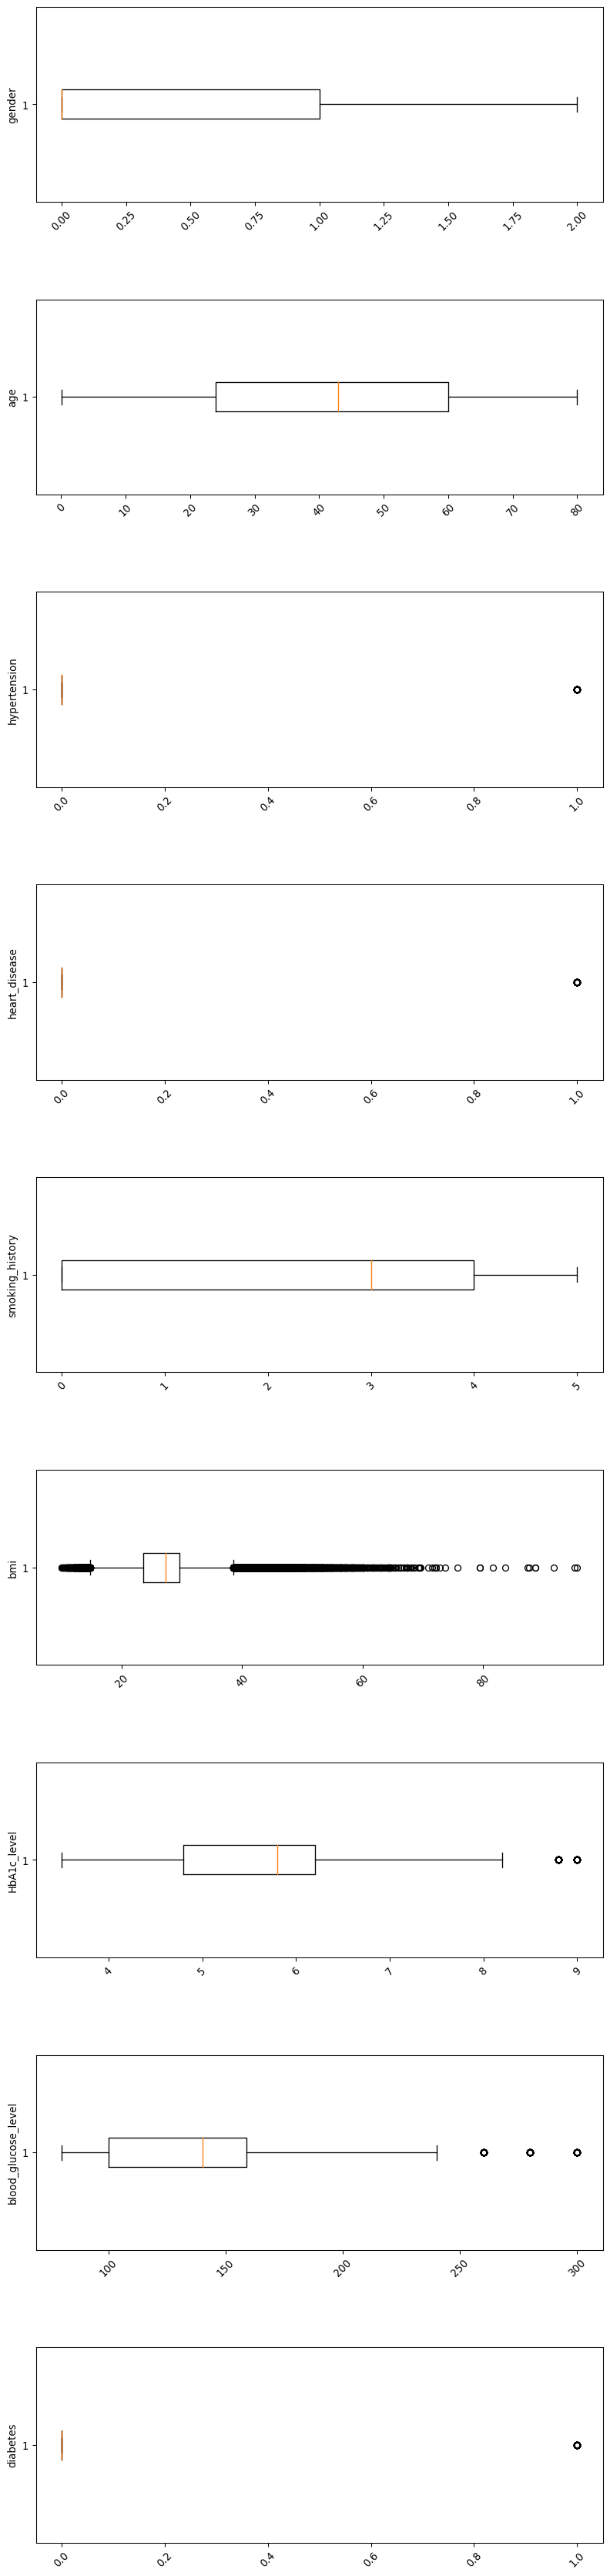

In [23]:
fig, axs = plt.subplots(len(diabetes_data.columns), 1, dpi=95, figsize=(10, 5*len(diabetes_data.columns)), 
                        gridspec_kw={'hspace': 0.5})

for i, col in enumerate(diabetes_data.columns):
    axs[i].boxplot(diabetes_data[col], vert=False)
    axs[i].set_ylabel(col)
    axs[i].tick_params(axis='x', rotation=45)  

plt.show()

In [24]:
z_scores = stats.zscore(diabetes_data)

threshold = 3

outliers = (z_scores > threshold) | (z_scores < -threshold)

num_outliers = outliers.sum()

total_records = diabetes_data.shape[0]
proportion_outliers = num_outliers / total_records

diabetes_cleaned_data = diabetes_data[~outliers.any(axis=1)]

diabetes_cleaned_data.to_csv('diabetes_cleaned_data.csv', index=False)

print("Number of outliers filtered:", num_outliers)
print("Proportion of outliers filtered:", proportion_outliers)

Number of outliers filtered: gender                   18
age                       0
hypertension           7485
heart_disease          3942
smoking_history           0
bmi                    1294
HbA1c_level            1315
blood_glucose_level    1403
diabetes               8500
dtype: int64
Proportion of outliers filtered: gender                 0.00018
age                    0.00000
hypertension           0.07485
heart_disease          0.03942
smoking_history        0.00000
bmi                    0.01294
HbA1c_level            0.01315
blood_glucose_level    0.01403
diabetes               0.08500
dtype: float64


### Number of independent and dependent variables

In [25]:
num_independent_variables_movies_data = len(movies_data.columns) - 1
num_dependent_variables_movies_data = 1

print("Number of independent variables:", num_independent_variables_movies_data)
print("Number of dependent variables:", num_dependent_variables_movies_data)

Number of independent variables: 9
Number of dependent variables: 1


In [26]:
num_independent_variables_prices_data = len(prices_data.columns) - 1
num_dependent_variables_prices_data = 1

print("Number of independent variables:", num_independent_variables_prices_data)
print("Number of dependent variables:", num_dependent_variables_prices_data)

Number of independent variables: 6
Number of dependent variables: 1


In [27]:
num_independent_variables_diabetes_data = len(diabetes_data.columns) - 1
num_dependent_variables_diabetes_data = 1

print("Number of independent variables:", num_independent_variables_diabetes_data)
print("Number of dependent variables:", num_dependent_variables_diabetes_data)

Number of independent variables: 8
Number of dependent variables: 1


### Number and proportion of duplications removed and technique employed towards duplication removing

In [28]:
num_records_before = len(movies_data)

movies_data.drop_duplicates(inplace=True)

num_records_after = len(movies_data)

num_duplicates_removed = num_records_before - num_records_after

proportion_duplicates_removed = num_duplicates_removed / num_records_before

print("Number of duplicate records removed:", num_duplicates_removed)
print("Proportion of duplicates removed:", proportion_duplicates_removed)

Number of duplicate records removed: 6
Proportion of duplicates removed: 0.00038689708537529015


In [29]:
num_records_before = len(prices_data)

prices_data.drop_duplicates(inplace=True)

num_records_after = len(prices_data)

num_duplicates_removed = num_records_before - num_records_after

proportion_duplicates_removed = num_duplicates_removed / num_records_before

print("Number of duplicate records removed:", num_duplicates_removed)
print("Proportion of duplicates removed:", proportion_duplicates_removed)

Number of duplicate records removed: 0
Proportion of duplicates removed: 0.0


In [30]:
num_records_before = len(diabetes_data)

diabetes_data.drop_duplicates(inplace=True)

num_records_after = len(diabetes_data)

num_duplicates_removed = num_records_before - num_records_after

proportion_duplicates_removed = num_duplicates_removed / num_records_before

print("Number of duplicate records removed:", num_duplicates_removed)
print("Proportion of duplicates removed:", proportion_duplicates_removed)

Number of duplicate records removed: 3854
Proportion of duplicates removed: 0.03854


In [31]:
print("Data Types:")
print(movies_data.dtypes)

binary_features = []
nominal_features = []
categorical_features = []
textual_features = []
numerical_features = []

for col in movies_data.columns:
    if movies_data[col].nunique() == 2: 
        binary_features.append(col)
    elif movies_data[col].dtype == 'object': 
        if movies_data[col].nunique() < 10:  
            nominal_features.append(col)
        else:
            textual_features.append(col)
    elif movies_data[col].dtype == np.int64 or movies_data[col].dtype == np.float64:  
        numerical_features.append(col)
    else:
        categorical_features.append(col) 

print("\nBinary Features:", binary_features)
print("\nNominal Features:", nominal_features)
print("\nCategorical Features:", categorical_features)
print("\nTextual Features:", textual_features)
print("\nNumerical Features:", numerical_features)

Data Types:
Name          int32
Year        float64
Duration      int32
Genre         int32
Rating        int64
Votes        object
Director      int32
Actor 1       int32
Actor 2       int32
Actor 3       int32
dtype: object

Binary Features: []

Nominal Features: []

Categorical Features: ['Name', 'Duration', 'Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']

Textual Features: ['Votes']

Numerical Features: ['Year', 'Rating']


In [32]:
print("Data Types:")
print(prices_data.dtypes)

binary_features = []
nominal_features = []
categorical_features = []
textual_features = []
numerical_features = []

for col in prices_data.columns:
    if prices_data[col].nunique() == 2: 
        binary_features.append(col)
    elif prices_data[col].dtype == 'object': 
        if prices_data[col].nunique() < 10:  
            nominal_features.append(col)
        else:
            textual_features.append(col)
    elif prices_data[col].dtype == np.int64 or prices_data[col].dtype == np.float64:  
        numerical_features.append(col)
    else:
        categorical_features.append(col) 

print("\nBinary Features:", binary_features)
print("\nNominal Features:", nominal_features)
print("\nCategorical Features:", categorical_features)
print("\nTextual Features:", textual_features)
print("\nNumerical Features:", numerical_features)

Data Types:
State                   int32
City                    int32
Year                    int64
Month                   int64
Day                     int64
Store type              int32
Price per kilogram    float64
dtype: object

Binary Features: ['Store type']

Nominal Features: []

Categorical Features: ['State', 'City']

Textual Features: []

Numerical Features: ['Year', 'Month', 'Day', 'Price per kilogram']


In [33]:
print("Data Types:")
print(diabetes_data.dtypes)

binary_features = []
nominal_features = []
categorical_features = []
textual_features = []
numerical_features = []

for col in diabetes_data.columns:
    if diabetes_data[col].nunique() == 2: 
        binary_features.append(col)
    elif diabetes_data[col].dtype == 'object': 
        if diabetes_data[col].nunique() < 10:  
            nominal_features.append(col)
        else:
            textual_features.append(col)
    elif diabetes_data[col].dtype == np.int64 or diabetes_data[col].dtype == np.float64:  
        numerical_features.append(col)
    else:
        categorical_features.append(col) 

print("\nBinary Features:", binary_features)
print("\nNominal Features:", nominal_features)
print("\nCategorical Features:", categorical_features)
print("\nTextual Features:", textual_features)
print("\nNumerical Features:", numerical_features)

Data Types:
gender                   int32
age                    float64
hypertension             int64
heart_disease            int64
smoking_history          int32
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

Binary Features: ['hypertension', 'heart_disease', 'diabetes']

Nominal Features: []

Categorical Features: ['gender', 'smoking_history']

Textual Features: []

Numerical Features: ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']


### Dimensionality reduction based on PCA/OLS and self-observation

In [34]:
X = prices_data.drop(columns=['Price per kilogram']) 
y = prices_data['Price per kilogram']  

scaler = StandardScaler()
pca = PCA(n_components=2) 

X_scaled = scaler.fit_transform(X)

X_reduced_pca = pca.fit_transform(X_scaled)

print("Number of components retained after PCA:", pca.n_components_)

X_normalized = scaler.fit_transform(X)
total_instances = X.shape[0]
instances_normalized = X_normalized.shape[0]
proportion_normalized = instances_normalized / total_instances
technique_used = scaler.__class__.__name__

print("\n\nNumber of total data instances:", total_instances)
print("Number of instances normalized:", instances_normalized)
print("Proportion of total data instances that are normalized:", proportion_normalized)
print("Technique used for normalization:", technique_used)

Number of components retained after PCA: 2


Number of total data instances: 278886
Number of instances normalized: 278886
Proportion of total data instances that are normalized: 1.0
Technique used for normalization: StandardScaler


In [35]:
X_with_const = sm.add_constant(X)

ols_model = sm.OLS(y, X_with_const).fit()

print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:     Price per kilogram   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 14 Oct 2024   Prob (F-statistic):                nan
Time:                        18:07:28   Log-Likelihood:                    nan
No. Observations:              278886   AIC:                               nan
Df Residuals:                  278879   BIC:                               nan
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const             nan        nan        nan        n

In [36]:
selected_features = ['State', 'City', 'Year', 'Month', 'Day', 'Store type']

X_self_observation = X[selected_features]

In [37]:
X = diabetes_data.drop(columns=['diabetes'])  
y = diabetes_data['diabetes']     

X_scaled = scaler.fit_transform(X)

X_reduced_pca = pca.fit_transform(X_scaled)

print("Number of components retained after PCA:", pca.n_components_)

X_normalized = scaler.fit_transform(X)
total_instances = X.shape[0]
instances_normalized = X_normalized.shape[0]
proportion_normalized = instances_normalized / total_instances
technique_used = scaler.__class__.__name__

print("\n\nNumber of total data instances:", total_instances)
print("Number of instances normalized:", instances_normalized)
print("Proportion of total data instances that are normalized:", proportion_normalized)
print("Technique used for normalization:", technique_used)

Number of components retained after PCA: 2


Number of total data instances: 96146
Number of instances normalized: 96146
Proportion of total data instances that are normalized: 1.0
Technique used for normalization: StandardScaler


In [38]:
X_with_const = sm.add_constant(X)

ols_model = sm.OLS(y, X_with_const).fit()

print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:               diabetes   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.354
Method:                 Least Squares   F-statistic:                     6587.
Date:                Mon, 14 Oct 2024   Prob (F-statistic):               0.00
Time:                        18:07:29   Log-Likelihood:                 5741.3
No. Observations:               96146   AIC:                        -1.146e+04
Df Residuals:                   96137   BIC:                        -1.138e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.8876    

In [39]:
selected_features = ['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level']
  
X_self_observation = X[selected_features]

### First four characteristics of datasets after performing data cleaning steps.

In [40]:
num_columns = movies_data.shape[1]

data_types = {'Binary': [], 'Nominal': [], 'Categorical': [], 'Textual': [], 'Numerical': []}

summary_statistics = movies_data.describe()

print("\nNumber of columns (variables):", num_columns)
print("\nData types of combination:")
for data_type, features in data_types.items():
    if features:
        print(f"- {data_type} features: {', '.join(features)}")
    else:
        print(f"- {data_type} features: None")
    
print("\nSummary statistics:")
print(summary_statistics)


Number of columns (variables): 10

Data types of combination:
- Binary features: None
- Nominal features: None
- Categorical features: None
- Textual features: None
- Numerical features: None

Summary statistics:
               Name          Year      Duration         Genre        Rating  \
count  15502.000000  14976.000000  15502.000000  15502.000000  15502.000000   
mean    6901.084957  -1987.006677    123.444459    271.511934     63.779061   
std     3994.681359     25.417491     71.264113    164.406380     22.114309   
min        0.000000  -2022.000000      0.000000      0.000000      0.000000   
25%     3443.250000  -2009.000000     43.000000    163.000000     46.000000   
50%     6901.000000  -1991.000000    182.000000    299.000000     69.000000   
75%    10367.750000  -1968.000000    182.000000    409.000000     84.000000   
max    13836.000000  -1913.000000    182.000000    485.000000     84.000000   

           Director       Actor 1       Actor 2       Actor 3  
count  155

In [41]:
num_columns = prices_cleaned_data.shape[1]

data_types = {'Binary': [], 'Nominal': [], 'Categorical': [], 'Textual': [], 'Numerical': []}

summary_statistics = prices_cleaned_data.describe()

print("\nNumber of columns (variables):", num_columns)
print("\nData types of combination:")
for data_type, features in data_types.items():
    if features:
        print(f"- {data_type} features: {', '.join(features)}")
    else:
        print(f"- {data_type} features: None")
    
print("\nSummary statistics:")
print(summary_statistics)


Number of columns (variables): 7

Data types of combination:
- Binary features: None
- Nominal features: None
- Categorical features: None
- Textual features: None
- Numerical features: None

Summary statistics:
               State           City           Year          Month  \
count  278886.000000  278886.000000  278886.000000  278886.000000   
mean       16.228118      27.352402    2015.080015       6.384781   
std         9.364183      16.248063       4.912392       3.440216   
min         0.000000       0.000000    2007.000000       1.000000   
25%         8.000000      13.000000    2011.000000       3.000000   
50%        16.000000      27.000000    2015.000000       6.000000   
75%        25.000000      42.000000    2019.000000       9.000000   
max        31.000000      55.000000    2024.000000      12.000000   

                 Day     Store type  Price per kilogram  
count  278886.000000  278886.000000       272496.000000  
mean       15.951955       0.502460           12.

In [42]:
num_columns = diabetes_data.shape[1]

data_types = {'Binary': [], 'Nominal': [], 'Categorical': [], 'Textual': [], 'Numerical': []}

summary_statistics = diabetes_data.describe()

print("\nNumber of columns (variables):", num_columns)
print("\nData types of combination:")
for data_type, features in data_types.items():
    if features:
        print(f"- {data_type} features: {', '.join(features)}")
    else:
        print(f"- {data_type} features: None")
    
print("\nSummary statistics:")
print(summary_statistics)


Number of columns (variables): 9

Data types of combination:
- Binary features: None
- Nominal features: None
- Categorical features: None
- Textual features: None
- Numerical features: None

Summary statistics:
             gender           age  hypertension  heart_disease  \
count  96146.000000  96146.000000  96146.000000   96146.000000   
mean       0.416065     41.794326      0.077601       0.040803   
std        0.493287     22.462948      0.267544       0.197833   
min        0.000000      0.080000      0.000000       0.000000   
25%        0.000000     24.000000      0.000000       0.000000   
50%        0.000000     43.000000      0.000000       0.000000   
75%        1.000000     59.000000      0.000000       0.000000   
max        2.000000     80.000000      1.000000       1.000000   

       smoking_history           bmi   HbA1c_level  blood_glucose_level  \
count     96146.000000  96146.000000  96146.000000         96146.000000   
mean          2.231159     27.321461      

### Data balancing characteristics and splitting

In [43]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("\nNumber of records in the training set:", len(X_train))
print("Number of records in the testing set:", len(X_test))


Number of records in the training set: 67302
Number of records in the testing set: 28844


In [44]:
# Technique 1
model_1 = KNeighborsClassifier(n_neighbors=9)
model_1.fit(X_train, y_train)
predictions_1 = model_1.predict(X_test)
accuracy_1 = accuracy_score(y_test, predictions_1)


print("Accuracy for Technique 1:", accuracy_1)

conf_matrix_1 = confusion_matrix(y_test, predictions_1)
precision_1 = precision_score(y_test, predictions_1, average='weighted')
recall_1 = recall_score(y_test, predictions_1, average='weighted')
f1_1 = f1_score(y_test, predictions_1, average='weighted')


print("\n\nConfusion Matrix for Technique 1:")
print(conf_matrix_1)
print("\nPrecision for Technique 1:", precision_1)
print("Recall for Technique 1:", recall_1)
print("F1 Score for Technique 1:", f1_1)

Accuracy for Technique 1: 0.9512896962973235


Confusion Matrix for Technique 1:
[[26163   104]
 [ 1301  1276]]

Precision for Technique 1: 0.9501280861123517
Recall for Technique 1: 0.9512896962973235
F1 Score for Technique 1: 0.9444647920619629


In [45]:
# Technique 2: Decision Tree Classifier
model_2 = DecisionTreeClassifier()
model_2.fit(X_train, y_train)
predictions_2 = model_2.predict(X_test)
accuracy_2 = accuracy_score(y_test, predictions_2)

conf_matrix_2 = confusion_matrix(y_test, predictions_2)
precision_2 = precision_score(y_test, predictions_2, average='weighted')
recall_2 = recall_score(y_test, predictions_2, average='weighted')
f1_2 = f1_score(y_test, predictions_2, average='weighted')

print("Accuracy for Technique 2 (Decision Tree Classifier):", accuracy_2)

print("\nConfusion Matrix for Technique 2:")
print(conf_matrix_2)
print("\nPrecision for Technique 2:", precision_2)
print("Recall for Technique 2:", recall_2)
print("F1 Score for Technique 2:", f1_2)

Accuracy for Technique 2 (Decision Tree Classifier): 0.9493828872555817

Confusion Matrix for Technique 2:
[[25454   813]
 [  647  1930]]

Precision for Technique 2: 0.9509459857667061
Recall for Technique 2: 0.9493828872555817
F1 Score for Technique 2: 0.9500923653769894


In [46]:
results = {
    'Technique': ['KNN (k=9)', 'Decision Tree'],
    'Accuracy': [accuracy_1, accuracy_2],
    'Precision': [precision_1, precision_2],
    'Recall': [recall_1, recall_2],
    'F1 Score': [f1_1, f1_2]
}

results_df = pd.DataFrame(results)
print("Comparison of Model Performances:")
results_df

Comparison of Model Performances:


,Technique,Accuracy,Precision,Recall,F1 Score
0,KNN (k=9),0.951290,0.950128,0.951290,0.944465
1,Decision Tree,0.949383,0.950946,0.949383,0.950092


In [47]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("\nNumber of records in the training set:", len(X_train))
print("Number of records in the testing set:", len(X_test))


Number of records in the training set: 67302
Number of records in the testing set: 28844


In [48]:
# Technique 1
model_1 = KNeighborsRegressor(n_neighbors=9)
model_1.fit(X_train, y_train)
predictions_1 = model_1.predict(X_test)
mse_1 = mean_squared_error(y_test, predictions_1)


print("Mean Squared Error for Technique 1:", mse_1)

Mean Squared Error for Technique 1: 0.03931236742219963


In [49]:
# Technique 2: Decision Tree Regressor
model_2 = DecisionTreeRegressor()
model_2.fit(X_train, y_train)
predictions_2 = model_2.predict(X_test)
mse_2 = mean_squared_error(y_test, predictions_2)

print("Mean Squared Error for Technique 2 (Decision Tree Regressor):", mse_2)

Mean Squared Error for Technique 2 (Decision Tree Regressor): 0.0510678130633754


In [50]:
results = {
    'Technique': ['KNN (k=9)', 'Decision Tree'],
    'Mean Squared Error': [mse_1, mse_2]
}

results_df = pd.DataFrame(results)

print("Comparison of Model Performances:")
results_df

Comparison of Model Performances:


,Technique,Mean Squared Error
0,KNN (k=9),0.039312
1,Decision Tree,0.051068


In [51]:
X = diabetes_cleaned_data.drop(columns=['diabetes'])  
y = diabetes_cleaned_data['diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("\nNumber of records in the training set:", len(X_train))
print("Number of records in the testing set:", len(X_test))


Number of records in the training set: 58219
Number of records in the testing set: 24952


In [52]:
# Technique 1
model_1 = KNeighborsClassifier(n_neighbors=5)
model_1.fit(X_train, y_train)
predictions_1 = model_1.predict(X_test)
accuracy_1 = accuracy_score(y_test, predictions_1)


print("Accuracy for Technique 1:", accuracy_1)

conf_matrix_1 = confusion_matrix(y_test, predictions_1)
precision_1 = precision_score(y_test, predictions_1, average='weighted')
recall_1 = recall_score(y_test, predictions_1, average='weighted')
f1_1 = f1_score(y_test, predictions_1, average='weighted')


print("\n\nConfusion Matrix for Technique 1:")
print(conf_matrix_1)
print("\nPrecision for Technique 1:", precision_1)
print("Recall for Technique 1:", recall_1)
print("F1 Score for Technique 1:", f1_1)

Accuracy for Technique 1: 1.0


Confusion Matrix for Technique 1:
[[24952]]

Precision for Technique 1: 1.0
Recall for Technique 1: 1.0
F1 Score for Technique 1: 1.0


In [53]:
# Technique 2: Decision Tree Classifier
model_2 = DecisionTreeClassifier()
model_2.fit(X_train, y_train)
predictions_2 = model_2.predict(X_test)
accuracy_2 = accuracy_score(y_test, predictions_2)

conf_matrix_2 = confusion_matrix(y_test, predictions_2)
precision_2 = precision_score(y_test, predictions_2, average='weighted')
recall_2 = recall_score(y_test, predictions_2, average='weighted')
f1_2 = f1_score(y_test, predictions_2, average='weighted')

print("Accuracy for Technique 2 (Decision Tree Classifier):", accuracy_2)

print("\nConfusion Matrix for Technique 2:")
print(conf_matrix_2)
print("\nPrecision for Technique 2:", precision_2)
print("Recall for Technique 2:", recall_2)
print("F1 Score for Technique 2:", f1_2)

Accuracy for Technique 2 (Decision Tree Classifier): 1.0

Confusion Matrix for Technique 2:
[[24952]]

Precision for Technique 2: 1.0
Recall for Technique 2: 1.0
F1 Score for Technique 2: 1.0


In [54]:
results = {
    'Technique': ['KNN (k=9)', 'Decision Tree'],
    'Accuracy': [accuracy_1, accuracy_2],
    'Precision': [precision_1, precision_2],
    'Recall': [recall_1, recall_2],
    'F1 Score': [f1_1, f1_2]
}

results_df = pd.DataFrame(results)
print("Comparison of Model Performances:")
results_df

Comparison of Model Performances:


,Technique,Accuracy,Precision,Recall,F1 Score
0,KNN (k=9),1.0,1.0,1.0,1.0
1,Decision Tree,1.0,1.0,1.0,1.0
